In [36]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")



In [37]:
import zipfile
zip_path = r'C:\Users\vivek\OneDrive\Desktop\Machine Learning(IA)\ML_Assignments\Datasets\ionosphere.zip'

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all files in the zip
    print(zip_ref.namelist())


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open('ionosphere.data') as file:
        df = pd.read_csv(file, header=None)


['Index', 'ionosphere.data', 'ionosphere.names']


In [38]:
print(df.head())
print(df.shape)

   0   1        2        3        4        5        6        7        8   \
0   1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1   1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2   1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3   1   0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4   1   0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   

        9   ...       25       26       27       28       29       30  \
0  0.03760  ... -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267   
1 -0.04549  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626   
2  0.01198  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436   
3  0.00000  ...  0.90695  0.51613  1.00000  1.00000 -0.20099  0.25682   
4 -0.16399  ... -0.65158  0.13290 -0.53206  0.02431 -0.62197 -0.05707   

        31       32       33  34  
0 -0.54487  0.18641 -0.45300   g  
1 -0.06288 -0.13738 -0.02447   b  

In [39]:
# Preprocessing
df.columns = [f'feature_{i}' for i in range(34)] + ['target']
df['target'] = df['target'].map({'g': 1, 'b': 0}) 


In [40]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,target
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [41]:
# train-test split
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [42]:
# Standardization 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Train, predict, and evaluate
for name, model in models.items():
    print(f"\n{name}")
    start_time = time.time()

    # Fit and predict
    if name in ["Logistic Regression", "SVM (RBF Kernel)"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    end_time = time.time()
    runtime = end_time - start_time

    # Print model performance
    print(f"Runtime: {runtime:.4f} seconds")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)



Logistic Regression
Runtime: 0.0134 seconds
Accuracy: 0.9295774647887324
              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.92      0.98      0.95        46

    accuracy                           0.93        71
   macro avg       0.94      0.91      0.92        71
weighted avg       0.93      0.93      0.93        71

Confusion Matrix:
[[21  4]
 [ 1 45]]

SVM (RBF Kernel)
Runtime: 0.0081 seconds
Accuracy: 0.9577464788732394
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.96      0.98      0.97        46

    accuracy                           0.96        71
   macro avg       0.96      0.95      0.95        71
weighted avg       0.96      0.96      0.96        71

Confusion Matrix:
[[23  2]
 [ 1 45]]

Decision Tree
Runtime: 0.0191 seconds
Accuracy: 0.9154929577464789
              precision    recall  f1-score   support

    

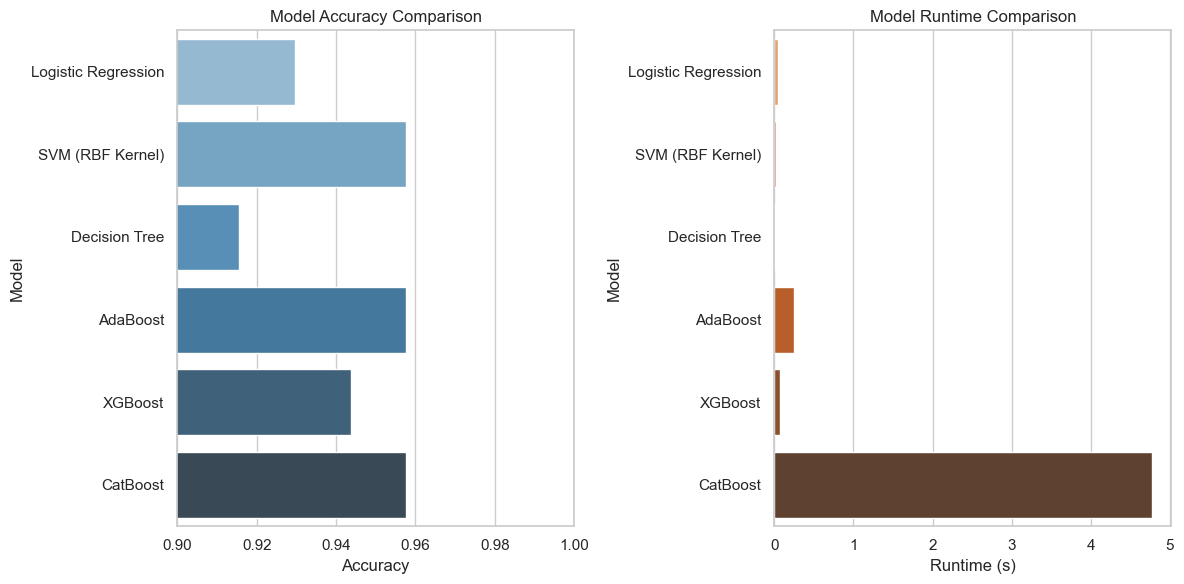

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Model performance summary
data = {
    "Model": [
        "Logistic Regression",
        "SVM (RBF Kernel)",
        "Decision Tree",
        "AdaBoost",
        "XGBoost",
        "CatBoost"
    ],
    "Accuracy": [0.9295774647887324, 0.9577464788732394, 0.9154929577464789, 0.9577464788732394, 0.9436619718309859, 0.9577464788732394],
    "Runtime (s)": [0.0471, 0.0174, 0.0147, 0.2536, 0.0746, 4.7788],
    "F1-Score": [0.92, 0.95, 0.91, 0.96, 0.94, 0.96]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set style
sns.set(style="whitegrid")

# Create plots
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
sns.barplot(x="Accuracy", y="Model", data=df, palette="Blues_d")
plt.title("Model Accuracy Comparison")
plt.xlim(0.9, 1.0)

# Runtime plot
plt.subplot(1, 2, 2)
sns.barplot(x="Runtime (s)", y="Model", data=df, palette="Oranges_d")
plt.title("Model Runtime Comparison")

# Layout adjustment
plt.tight_layout()
plt.show()
